In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [ ]:
df = pd.DataFrame(X, columns=["col1", "col2", "col3", "col4", "col5"])
df["target"] = y
df.head()

,col1,col2,col3,col4,col5,target
0,0.127832,-1.242783,2.106511,0.996145,1.695678,1
1,-2.370279,1.343957,-0.909906,-0.733350,-1.694279,0
2,-0.792706,0.729878,0.004998,2.573187,-1.191962,1
3,-0.614229,-1.891486,1.959062,1.541186,-1.119581,1
4,-0.500411,-0.029630,1.734461,1.945037,-0.154051,1


In [ ]:
df.shape

(100, 6)

# Now we will make samples from the data

## fucntion for row sampling

In [ ]:
def sample_rows(df, percent):
  return df.sample(int(percent * df.shape[0]), replace=True)

In [ ]:
sample_rows(df, 0.1)

,col1,col2,col3,col4,col5,target
63,-0.986140,-0.280604,-0.071160,-1.258843,-0.530873,0
70,0.312911,1.388682,-2.149963,-2.573477,-0.567632,0
89,-0.251717,0.616968,-1.628073,3.622176,-1.577357,1
53,-0.124657,-0.146548,0.202484,-0.091635,0.202044,0
37,0.265170,-0.506353,0.605109,-2.391890,0.604861,0
61,-2.768669,0.062814,1.523046,0.477678,-1.113183,0
57,2.884665,-0.570835,-5.597776,-4.095729,0.245399,0
30,-0.399506,1.187053,-5.874768,-3.114869,-1.081148,0
33,-0.656600,1.502833,0.900887,-1.038964,-0.242855,0
10,-0.822383,0.395804,-1.105284,-1.827447,0.238400,0


## fucntion for column sampling

In [ ]:
import random
def sample_col(df, percent):
  col = random.sample(df.columns.tolist()[:-1], int(df.shape[1]*percent))
  return df[col]

In [ ]:
sample_col(df, 0.5)

,col5,col1,col3
0,1.695678,0.127832,2.106511
1,-1.694279,-2.370279,-0.909906
2,-1.191962,-0.792706,0.004998
3,-1.119581,-0.614229,1.959062
4,-0.154051,-0.500411,1.734461
...,...,...,...
95,1.488294,-1.787275,1.163928
96,-2.022505,-1.958458,-1.733385
97,5.991553,-1.336230,2.697524
98,0.148244,-0.525217,-2.013163


In [ ]:
random.sample(df.columns.tolist()[:-1], int(df.shape[1]*0.5))

['col4', 'col2', 'col1']

In [ ]:
df.columns.tolist()[:-1]

['col1', 'col2', 'col3', 'col4', 'col5']

## fucntion for rows and column(combined) sampling

In [ ]:
def combined_sample(df, row_sample, col_sample):
  new_df = sample_rows(df, row_sample)
  return sample_col(new_df, col_sample)

In [ ]:
combined_sample(df, 0.1, 0.5)

,col4,col3,col2
66,-0.985814,1.426151,0.078797
96,-0.879021,-1.733385,-0.336000
81,-0.757474,0.772520,1.360025
51,1.793461,0.489950,2.073539
0,0.996145,2.106511,-1.242783
25,-1.438708,-2.144957,0.586264
77,4.569812,-0.473949,2.239769
15,0.219208,1.349062,0.792136
0,0.996145,2.106511,-1.242783
54,0.978897,1.386361,-0.555796


In [ ]:
df1 = sample_rows(df, 0.2)
df1.shape

(20, 6)

In [ ]:
df1.head()

,col1,col2,col3,col4,col5,target
51,-0.763207,2.073539,0.489950,1.793461,1.029538,1
71,-1.474423,1.420692,-0.575813,-2.372849,-0.576314,0
66,-2.079062,0.078797,1.426151,-0.985814,0.885422,1
58,-1.936255,1.247413,1.384035,-1.051056,2.380985,1
82,-1.824379,2.327269,0.017759,1.225759,-1.622247,0


In [ ]:
df2 = sample_rows(df, 0.2)

In [ ]:
df3 = sample_rows(df, 0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:5], df1.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
clf2.fit(df2.iloc[:,0:5], df2.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
clf3.fit(df3.iloc[:,0:5], df3.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'x[1] <= 1.304\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.3, 0.625, 'x[1] <= -0.397\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.2, 0.375, 'x[1] <= -1.043\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.7, 0.625, 'x[0] <= -1.354\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.375, 'x[1] <= 1.908\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

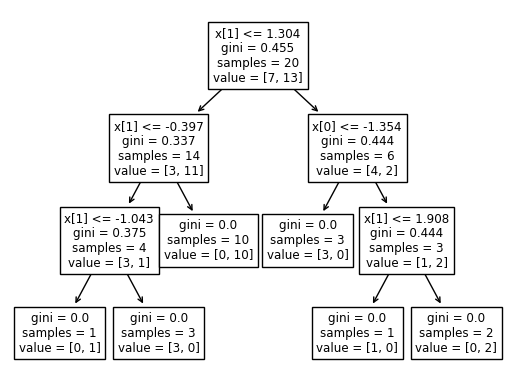

In [ ]:
plot_tree(clf1)

[Text(0.5, 0.9166666666666666, 'x[0] <= 0.852\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.375, 0.75, 'x[1] <= -0.132\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.5833333333333334, 'x[0] <= -1.128\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.25, 0.4166666666666667, 'x[1] <= 1.409\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.4166666666666667, 'x[0] <= -0.808\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.625, 0.25, 'x[0] <= -0.854\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.75, 'gini = 0.0\nsamples = 3\

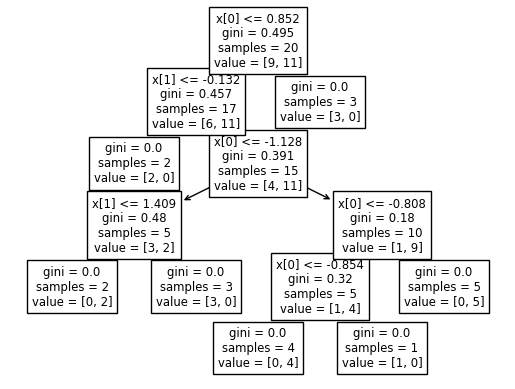

In [ ]:
plot_tree(clf2)

[Text(0.5, 0.9, 'x[0] <= -2.153\ngini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.7, 'x[0] <= 0.095\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.5, 0.5, 'x[1] <= -0.609\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.3333333333333333, 0.3, 'x[0] <= -0.87\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

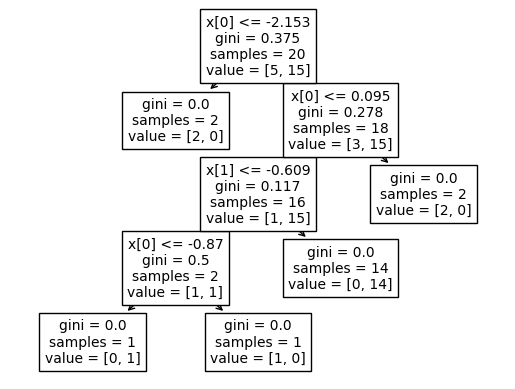

In [ ]:
plot_tree(clf3)

In [88]:
clf1_op = clf1.predict(np.array([-2.079062,	0.078797,	1.426151,	-0.985814,	0.885422]).reshape(1,5))
print(int(clf1_op))

1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-88-f86ba72e480a>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(clf1_op))


In [86]:
clf2_op = clf2.predict(np.array([-2.079062,	0.078797,	1.426151,	-0.985814,	0.885422]).reshape(1,5))
print(int(clf2_op))

0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-86-f2ff0e3df94d>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(clf2_op))


In [87]:
clf3_op = clf3.predict(np.array([-2.079062,	0.078797,	1.426151,	-0.985814,	0.885422]).reshape(1,5))
print(int(clf3_op))

1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-87-5b37da33297e>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(clf3_op))


In [100]:
# in the bagging the result will be
import statistics as st
arr1 = np.array([clf1_op, clf2_op, clf3_op])

In [101]:
arr1_flattened = arr1.flatten()  # Flatten the array to a 1D list for the mode function
mode_value = st.mode(arr1_flattened.tolist())

print(mode_value)

1


In [102]:
arr1

array([[1],
       [0],
       [1]])

In [91]:
import statistics as st
import numpy as np

# create an 1 d array
arr1 = np.array([9, 8, 7, 6, 6, 6, 6, 5, 5, 4,
				3, 2, 1, 1, 1, 1, 1, 1])

# display the mode
print(st.mode(arr1))


1
